In [23]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression, RANSACRegressor
from sklearn.model_selection import train_test_split
from eval_scores import scores

In [24]:
#Extract data
X = np.load('Xtrain_Regression_Part2.npy')
y = np.load('Ytrain_Regression_Part2.npy')
X_test = np.load('Xtest_Regression_Part2.npy')

In [25]:
# Turning the numpy array of X into 
list_of_features = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13','Column_14','Column_15','Column_16','Column_17','Column_18','Column_19','Column_20']
df_raw = pd.DataFrame(X, columns = list_of_features)
y_df_raw = pd.DataFrame(y, columns = ['y'])

# Have a look at the format of the data
df_raw.head()


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20
0,-1.290089,0.038961,0.228235,0.101686,-0.067296,-0.637278,-0.295017,-0.450571,-2.405162,2.328489,-1.086107,-0.675255,0.288608,0.282775,0.217768,0.929042,0.705605,0.130496,-1.616716,0.004275
1,0.963710,1.841056,1.251256,-1.603235,0.340050,-0.233890,1.726259,0.485200,-1.555082,0.872393,0.776311,-0.114605,-0.448800,1.338183,2.203141,-0.179866,0.134610,-0.198595,0.499642,-1.133330
2,0.652553,0.533144,-1.787609,-1.169125,-0.525402,0.257441,-0.629267,0.162554,-0.985946,-1.245303,0.762217,0.427465,0.834908,1.686784,0.051292,-0.870790,0.127209,-0.190596,-1.363593,1.465699
3,-0.410840,-1.257023,-0.017595,1.313880,-0.521560,2.934458,-0.520630,0.063651,-1.141947,-0.251534,-1.489881,-0.703005,1.106951,0.580637,-0.057783,-0.766014,1.569594,-0.361484,0.436235,-0.449029
4,-1.769616,-1.289050,1.572451,-1.764423,0.354585,-0.484731,-0.487435,-0.158962,0.467395,0.952608,-1.246483,1.599535,0.874688,0.638029,1.557111,1.344622,0.745231,0.274891,2.472565,1.583625


In [26]:
# check the shape of the dataframe
df_raw.shape

(100, 20)

In [27]:
# descriptive stats
df_raw.describe()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.096306,0.103394,-0.041093,-0.036073,-0.051363,0.175977,-0.002615,0.021736,-0.110863,0.068009,0.058208,0.118485,0.102668,0.040101,0.190118,0.014326,0.066005,-0.040918,0.036576,-0.050878
std,0.947031,0.950758,1.073739,1.007231,0.992275,0.995634,0.924536,1.125673,1.117951,0.937170,1.024629,0.915533,0.929227,0.987411,1.113879,0.981693,0.918804,0.880285,1.065829,1.030510
min,-2.237765,-1.694381,-3.433329,-2.851244,-2.558154,-1.788471,-1.965246,-3.310151,-2.953069,-2.286955,-2.027333,-2.017503,-2.584288,-2.372827,-1.984497,-2.286663,-2.240194,-2.006596,-2.560387,-2.830737
25%,-0.776680,-0.552726,-0.619567,-0.601832,-0.657576,-0.555407,-0.648780,-0.656277,-0.986965,-0.522125,-0.713441,-0.397109,-0.474409,-0.523735,-0.656624,-0.766512,-0.639798,-0.581918,-0.738254,-0.846551
50%,-0.122215,0.065946,-0.058747,-0.074514,0.045014,0.154525,-0.107089,0.125309,-0.009224,-0.042286,0.074529,0.077402,0.180081,0.025515,0.098189,0.098965,0.130909,-0.017476,0.145513,0.067945
75%,0.554967,0.700684,0.631118,0.699446,0.593339,0.780462,0.607118,0.660079,0.704632,0.642025,0.767151,0.709581,0.761737,0.648176,0.886054,0.728499,0.734412,0.458716,0.777096,0.696973
max,2.435484,2.290980,3.020603,2.168331,1.907413,2.934458,2.130421,3.019401,2.074649,2.425904,2.670014,2.175048,2.022771,3.159331,3.076485,2.431136,2.003396,1.909748,2.730227,2.093984


In [28]:
# define a function called "plot_boxplot" to get a visual representation of potential outliers
def plot_boxplot(dataframe, feature):
    dataframe.boxplot(column = [feature])
    plt.grid(False)
    plt.show

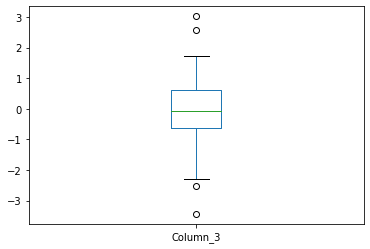

In [29]:
plot_boxplot(df_raw, "Column_3")
# Indicates outliers.
# See seperate file for boxplot of every feature

In [30]:
# returns a list of index of outliers
# IQR = Q3 - Q1

def outliers(df, feature):

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_list = df.index[ (df[feature] < lower) | (df[feature] > upper) ]

    return outlier_list

In [31]:
# Extract the indexes of the outliers
index_list = []

for feature in list_of_features:
    index_list.extend(outliers(df_raw, feature))

In [32]:
index_list

[21, 36, 78, 96, 49, 53, 3, 7, 12, 42, 12, 93, 31, 61, 23, 76]

In [33]:
# Remove outliers and return a clean dataframe
def remove_outlier(df, index_list):
    ls = sorted(set(index_list))
    df = df.drop(ls)
    return df

In [34]:
X_cleaned = remove_outlier(df_raw, index_list)
X_cleaned.shape

(85, 20)

In [35]:
y_cleaned = remove_outlier(y_df_raw, index_list)
y_cleaned.shape

(85, 1)

In [36]:
# Convert pandas dataframe to numpy arrays
X_np_cleaned = X_cleaned.to_numpy()
y_np_cleaned = y_cleaned.to_numpy()
print(type(X_np_cleaned))

<class 'numpy.ndarray'>


In [37]:
## Remove outliers validation test 

#Create training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X, y)

# RANSAC
ransac_regmod = RANSACRegressor()

# Training
ransac_regmod.fit(X_train, y_train)

# Turning the numpy array of X into 
list_of_features = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6','Column_7','Column_8','Column_9','Column_10','Column_11','Column_12','Column_13','Column_14','Column_15','Column_16','Column_17','Column_18','Column_19','Column_20']
df_raw = pd.DataFrame(X_validate, columns = list_of_features)
y_df_raw = pd.DataFrame(y_validate, columns = ['y'])

# Find outliers
index_list = []
for feature in list_of_features:
    index_list.extend(outliers(df_raw, feature))

print(index_list)


[4, 11, 13, 16, 19, 11, 0, 3, 12, 23, 17, 3, 12, 13, 18, 20, 23, 22]


In [38]:
# Remove outliers
X_validate_clean = remove_outlier(df_raw, index_list)
y_validate_clean = remove_outlier(y_df_raw, index_list)

X_validate_clean = X_validate_clean.to_numpy()
y_validate_clean = y_validate_clean.to_numpy()

# Predict for validation set
ransac_reg_pred = ransac_regmod.predict(X_validate_clean)

# MSE
score_ransac = scores(y_validate_clean,ransac_reg_pred,'r')

The Mean Square Error is 0.011574565233153323


In [39]:

#Create training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_np_cleaned, y_np_cleaned.ravel())

## Bayesian Ridge
bayridge_regmod = BayesianRidge()

# Training
bayridge_regmod.fit(X_train, y_train)

# Predict for test
bayridge_reg_pred = bayridge_regmod.predict(X_validate)

score_bayridge = scores(y_validate, bayridge_reg_pred,'r')

The Mean Square Error is 5.188513345509846


In [40]:
linear_regression_model = LinearRegression()

# Training
linear_regression_model.fit(X_train, y_train)

# Predict for validation set
linear_regression_predictions = linear_regression_model.predict(X_validate)

# Result
score_linear = scores(y_validate,linear_regression_predictions,'r')

The Mean Square Error is 5.191877449982268


In [41]:
# RANSAC
ransac_regmod = RANSACRegressor()

# Training
ransac_regmod.fit(X_train, y_train)

# Predict for validation set
ransac_reg_pred = ransac_regmod.predict(X_validate)

# MSE
score_ransac = scores(y_validate,ransac_reg_pred,'r')

The Mean Square Error is 5.191877449982268


In [42]:
# RANSAC with normal set
X_train, X_validate, y_train, y_validate = train_test_split(X, y)

# RANSAC
ransac_regmod = RANSACRegressor()

# Training
ransac_regmod.fit(X_train, y_train)

# Predict for validation set
ransac_reg_pred = ransac_regmod.predict(X_validate)

# MSE
score_ransac = scores(y_validate,ransac_reg_pred,'r')

The Mean Square Error is 0.01999537775724041
